In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [11]:
FLAVORS=[12,14,16,-12,-14,-16]
def get_all_fluxes(exp='FASER'):
    enu_c,_ = np.genfromtxt(f"{exp}_12.txt", unpack=True)
    flux={}
    for nu in FLAVORS:
        _, flux[f"{nu}"] = np.genfromtxt(f"FASER_{nu}.txt", unpack=True)
    return enu_c,flux
        
enu_c, fluxes =get_all_fluxes(exp='FASER')

Text(0.5, 0, '$E_\\nu$/GeV')

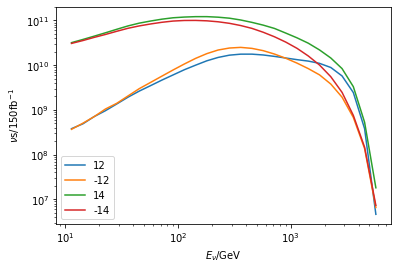

In [33]:
plt.plot(enu_c, fluxes['12'], label='12')
plt.plot(enu_c, fluxes['-12'], label='-12')
plt.plot(enu_c, fluxes['14'], label='14')
plt.plot(enu_c, fluxes['-14'], label='-14')

plt.yscale("log")
plt.xscale("log")

plt.legend()
plt.ylabel(r"$\nu$s/$150$fb$^{-1}$")
plt.xlabel(r"$E_\nu$/GeV")

In [34]:
# e=np.linspace(10,7e3)
np.sum(1.2e6*6.022e23*(fluxes['14']*0.8e-38+fluxes['-14']*0.35e-38)*enu_c/(70*65/2))*(enu_c[1]-enu_c[0])

5477.7500999989525

In [35]:
globes_fhc = [enu_c, 
                fluxes['12'],
                fluxes['14'],
                fluxes['16'],
                fluxes['-12'],
                fluxes['-14'],
                fluxes['-16']]              

np.savetxt("../FASERnu.dat",np.array(globes_fhc).T,header='nus/cm^2/150 fb^-1')

Text(0.5, 0, '$E_\\nu$/GeV')

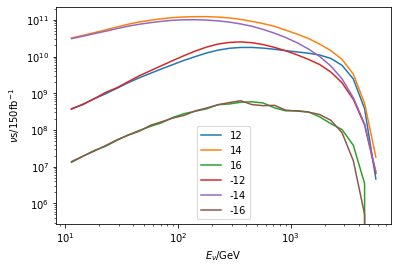

In [42]:
enu_c, *fluxes = np.genfromtxt("../FASERnu.dat",unpack=True)
plt.plot(enu_c, fluxes[0], label='12')
plt.plot(enu_c, fluxes[1], label='14')
plt.plot(enu_c, fluxes[2], label='16')
plt.plot(enu_c, fluxes[3], label='-12')
plt.plot(enu_c, fluxes[4], label='-14')
plt.plot(enu_c, fluxes[5], label='-16')

plt.yscale("log")
plt.xscale("log")

plt.legend()
plt.ylabel(r"$\nu$s/$150$fb$^{-1}$")
plt.xlabel(r"$E_\nu$/GeV")
